In [1]:
#%matplotlib notebook
import json
import requests
#from config import api_key
import matplotlib.pyplot as plt
import datetime
from time import strptime
import numpy as np
import pandas as pd
import os
import csv
import re

In [2]:
low_memory = True

reddit_df = pd.read_csv('d:/DataAnalytics/bitcoin_reddit_all.csv')
reddit_df['author'].count()

# DtypeWarning: Columns (0,1,2,3,4,8) have mixed types

reddit_subset_df = reddit_df.head(10000)
reddit_tail_df = reddit_df.tail(1000)
# reddit_df['date'] = pd.to_datetime(reddit_subset_df['date'], format='%YYYY-%mm-%dd')

C:\Users\sharp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,3,4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
reddit_tail_df.head()

In [ ]:
# dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
# df = pd.read_csv(infile, parse_dates=['datetime'], date_parser=dateparse)

Reddit_subset_df['date'] = pd.to_datetime(Reddit_subset_df['date'], format='%Y-%m-%d')
Reddit_subset_df = Reddit_subset_df.sort_values(['date'])
Reddit_subset_groupby_df = Reddit_subset_df.groupby(pd.Grouper(key='date',freq='1W'))
Reddit_subset_groupby_df.count()


In [4]:
reddit_df['date'].nunique()

3309

In [8]:
reddit_df['date'] = pd.to_datetime(reddit_df['date'], yearfirst= True)

# reddit_df = reddit_df.sort_values(['date'])

reddit_df['date'].nunique()

reddit_groupby_df = reddit_df.groupby(pd.Grouper(key='date',freq='1M'))
reddit_groupby_df.count()

,Unnamed: 0,datetime,author,subreddit,created_utc,score,controversiality,body
date,,,,,,,,
2009-05-31,4,4,4,4,4,4,4,4
2009-06-30,0,0,0,0,0,0,0,0
2009-07-31,1,1,1,1,1,1,1,1
2009-08-31,0,0,0,0,0,0,0,0
2009-09-30,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...
2019-08-31,45516,45516,45516,45516,45516,45516,45516,45516
2019-09-30,38455,38455,38455,38455,38455,38455,38455,38455
2019-10-31,37261,37261,37261,37261,37261,37261,37261,37261


(14245.0, 18745.0)

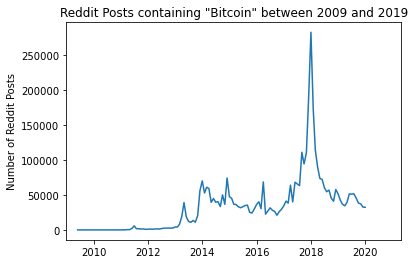

In [16]:
plt.plot(reddit_groupby_df['author'].count())
plt.title('Reddit Posts containing "Bitcoin" between 2009 and 2019')
plt.ylabel("Number of Reddit Posts")
plt.xlim([datetime.date(2009,1,1), datetime.date(2021,4,28)])

In [ ]:
tweets16m_df = pd.read_csv('d:/DataAnalytics/tweets-16M.csv')
